## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep="," )
data.shape

(1000, 21)

In [ ]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.head(15)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
5,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,...,unknown / no property,48,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
6,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,male : married/widowed,none,...,unknown / no property,39,none,rent,2-3,unskilled - resident,0 to 2,no,yes,good
7,no checking account,6,all credits at this bank paid back duly,others,1361,unknown/no savings account,< 1 yr,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,40,none,rent,1,unskilled - resident,3 or more,no,yes,good
8,... >= 200 DM / salary for at least 1 year,18,all credits at this bank paid back duly,furniture/equipment,1098,unknown/no savings account,unemployed,< 20,female : non-single or male : single,none,...,building soc. savings agr./life insurance,65,none,rent,2-3,unemployed/unskilled - non-resident,0 to 2,no,no,good
9,... < 0 DM,24,no credits taken/all credits paid back duly,furniture/equipment,3758,100 <= ... < 500 DM,unemployed,>= 35,female : non-single or male : single,none,...,real estate,23,none,for free,1,unemployed/unskilled - non-resident,0 to 2,no,no,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
#пропуски
for column in list(data):
  a = data[column].unique()
  print(a)

['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867

In [ ]:
#пропуски количественные, бинарные, порядковые и категориальные.
binary=[]
categorial = []
countable=[]
for column in list(data):
   if data[column].nunique() == 2:
    binary.append(column)
   elif data[column].dtypes == 'object':
    categorial.append(column)
   elif data[column].dtypes in ['int64', 'float64']:
    countable.append(column)

print("Бинарные признаки:", binary)
print("Категориальные признаки:", categorial)
print("Количественные признаки:", countable)

Бинарные признаки: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
Категориальные признаки: ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job']
Количественные признаки: ['duration', 'amount', 'age']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(['purpose']).mean()['amount']

<ipython-input-7-4d42af18b9d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['purpose']).mean()['amount']


purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
percentage_young = data[(data['age'] <= 30) & (data['housing'] == 'rent')].shape[0]/data.shape[0]
percentage_young * 100

27.900000000000002

In [ ]:
percentage_mid = data[(data['age'] >= 40) & (data['housing'] == 'rent')].shape[0]/data.shape[0]
percentage_mid * 100

20.5

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
foreigners = data[data['foreign_worker'] == 'yes']
foreigners_with_many_credits = foreigners[(foreigners['number_credits'] != '2-3') | (foreigners['number_credits'] != '1')]
foreigners_with_many_credits.shape[0]

37

### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [ ]:
# your code here

In [ ]:
import numpy as np


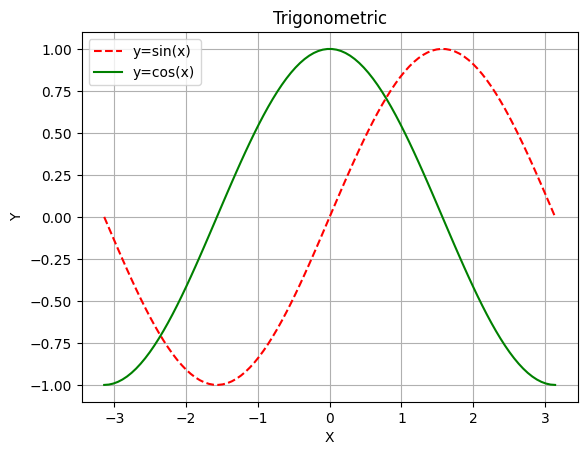

In [ ]:
#график
fig, ax = plt.subplots()
X = np.linspace(-np.pi, np.pi, 100)
plt.plot(X, np.sin(X), color = 'red', linestyle = '--', label = 'y=sin(x)')
plt.plot(X, np.cos(X), color = 'green', label = 'y=cos(x)')
ax.set(xlabel='X', ylabel='Y',
       title='Trigonometric')
ax.grid()
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

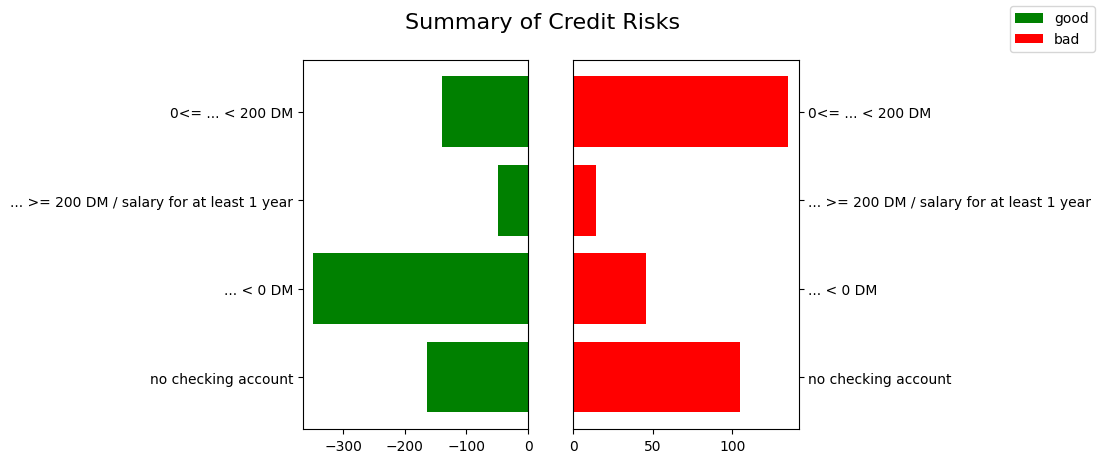

In [ ]:
groups = data['status'].unique()
good_counts = data[data['credit_risk'] == 'good'].groupby(['status']).size()
bad_counts = data[data['credit_risk'] == 'bad'].groupby(['status']).size()

fig, ax = plt.subplots(nrows= 1 , ncols= 2)

ax[0].barh(groups, -good_counts, color = 'green', label="good")
ax[1].barh(groups, bad_counts, color = 'red', label="bad")

ax[1].yaxis.tick_right()

fig.legend()

plt.suptitle('Summary of Credit Risks', fontsize=16)

plt.show()

### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [ ]:
# your code here

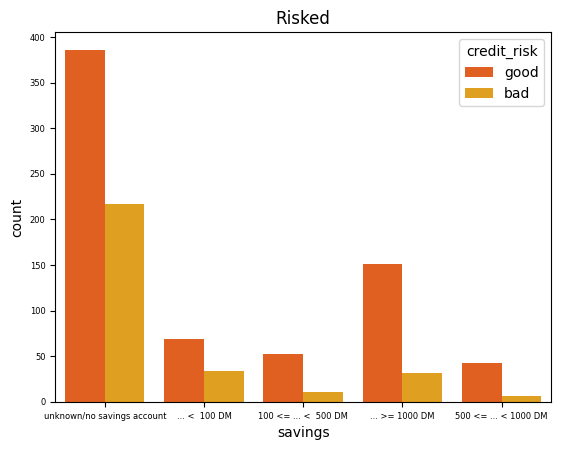

In [ ]:
sns.countplot(x='savings', hue='credit_risk', data=data, palette='autumn')
plt.tick_params (axis='both', which='major', labelsize= 6)
plt.title('Risked')
plt.show()


### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

In [ ]:
# your code here

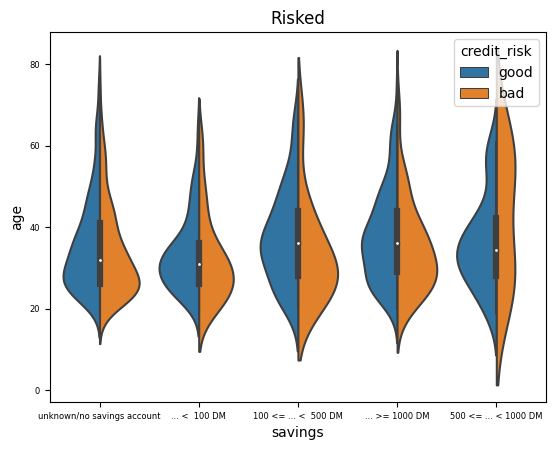

In [ ]:
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True)
plt.tick_params (axis='both', which='major', labelsize= 6)
plt.title('Risked')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [ ]:
# your code here

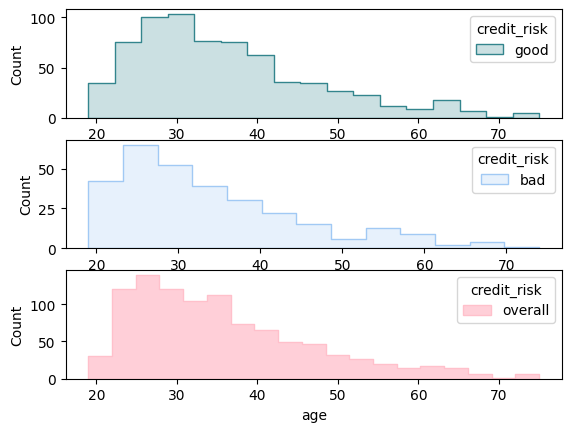

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
data1 = data[data['credit_risk'] == 'good']
data2 = data[data['credit_risk'] == 'bad']
sns.histplot(x='age', palette="crest",data=data1, hue = 'credit_risk',element="step", ax = ax1)
sns.histplot(x='age', palette="pastel",data=data2,hue = 'credit_risk',element="step",ax = ax2)
sns.histplot(x='age', color="pink",data=data,element="step",ax = ax3, label = 'overall')
plt.legend(title='credit_risk')

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

In [ ]:
# your code here

<Axes: xlabel='amount', ylabel='duration'>

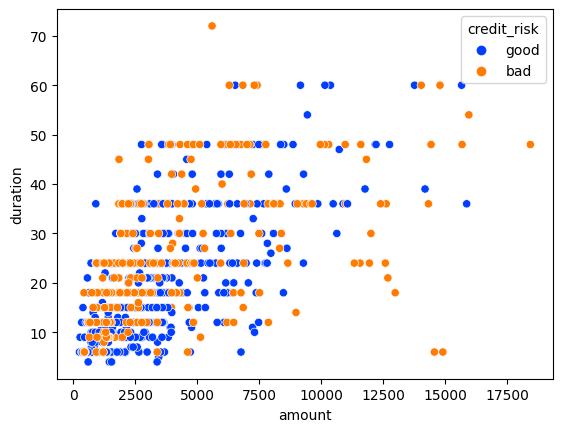

In [ ]:
sns.scatterplot(
    x='amount',
    y='duration',
    data=data,
    palette='bright',
    hue='credit_risk')

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

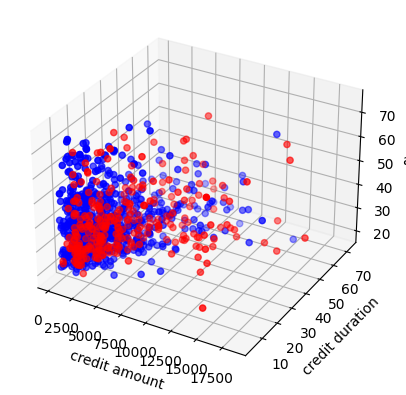

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data[data['credit_risk']=='good']['amount']
y = data[data['credit_risk']=='good']['duration']
z = data[data['credit_risk']=='good']['age']

x1 = data[data['credit_risk']=='bad']['amount']
y1 = data[data['credit_risk']=='bad']['duration']
z1 = data[data['credit_risk']=='bad']['age']

ax.set_xlabel("credit amount")
ax.set_ylabel("credit duration")
ax.set_zlabel("age")

ax.scatter(x, y, z, c='blue')
ax.scatter(x1, y1, z1, c='red')

plt.show()



In [ ]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
#Количественные: duration, amount, age, number_credits
#Бинарные: foreign_worker, credit_risk, telephone (do good credit risk -> True = good, False = Bad)
#Порядковые: status, credit_history, savings, employment_duration, installment_rate, personal_status_sex,
#other_debtors, present_residence, property, other_installment_plans, housing, job, people_liable,
#Категориальные: purpose

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

df = data.copy()
enc = OrdinalEncoder()

enc.fit(df[["foreign_worker", "credit_risk", "telephone"]])
df[["foreign_worker", "credit_risk", "telephone"]] = enc.transform(df[["foreign_worker", "credit_risk", "telephone"]])

enc.fit(df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable","number_credits"]])
df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable","number_credits"]] = enc.transform(df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable","number_credits"]])

df = df.drop(["purpose"], axis='columns')

df.head(15)


,status,duration,credit_history,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3.0,18,0.0,1049,4.0,2.0,2.0,0.0,2.0,3.0,1.0,21,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,9,0.0,2799,4.0,0.0,1.0,3.0,2.0,0.0,3.0,36,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,12,4.0,841,0.0,1.0,1.0,0.0,2.0,3.0,3.0,23,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
3,3.0,12,0.0,2122,4.0,0.0,0.0,3.0,2.0,0.0,3.0,39,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
4,3.0,12,0.0,2171,4.0,0.0,2.0,3.0,2.0,3.0,1.0,38,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0
5,3.0,10,0.0,2241,4.0,2.0,3.0,3.0,2.0,1.0,3.0,48,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
6,3.0,8,0.0,3398,4.0,1.0,3.0,3.0,2.0,3.0,3.0,39,1.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0
7,3.0,6,0.0,1361,4.0,2.0,1.0,3.0,2.0,3.0,3.0,40,1.0,2.0,0.0,3.0,1.0,0.0,1.0,1.0
8,1.0,18,0.0,1098,4.0,4.0,2.0,0.0,2.0,3.0,0.0,65,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0
9,0.0,24,4.0,3758,2.0,4.0,3.0,0.0,2.0,3.0,2.0,23,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
Data = df.copy()

def predict(Xtest: np.array) -> np.array:
  score=[]
  for xtest in Xtest:
    points = 10*(xtest[0]+xtest[2]+xtest[4]+xtest[5]+xtest[6]+xtest[7]+xtest[8]+xtest[9]+xtest[10]+xtest[12]+xtest[13]+xtest[14]+xtest[15]+xtest[16]+xtest[17]+xtest[18])+xtest[11]+int(0.1*xtest[3])+xtest[1]
    if points>330:
      score.append(1)
    else:
        score.append(0)
  return score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = Data.drop('credit_risk', 1).values
y = Data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


accuracy_score(y_test, predict(X_test))




<ipython-input-63-e3119c110d65>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = Data.drop('credit_risk', 1).values


0.656

In [ ]:
# sns.boxplot(x='credit_risk', y='amount', data=Data)
Data.groupby(['credit_risk'])['amount'].mean()

credit_risk
0.0    3938.126667
1.0    2985.442857
Name: amount, dtype: float64

In [ ]:
X.shape

(1000, 19)

In [ ]:
Data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3.0,18,0.0,1049,4.0,2.0,2.0,0.0,2.0,3.0,1.0,21,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,9,0.0,2799,4.0,0.0,1.0,3.0,2.0,0.0,3.0,36,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,12,4.0,841,0.0,1.0,1.0,0.0,2.0,3.0,3.0,23,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
3,3.0,12,0.0,2122,4.0,0.0,0.0,3.0,2.0,0.0,3.0,39,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
4,3.0,12,0.0,2171,4.0,0.0,2.0,3.0,2.0,3.0,1.0,38,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,24,4.0,1987,4.0,0.0,1.0,3.0,2.0,3.0,3.0,21,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
996,3.0,24,4.0,2303,4.0,3.0,2.0,3.0,0.0,2.0,3.0,45,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
997,1.0,21,0.0,12680,1.0,3.0,2.0,3.0,2.0,3.0,2.0,30,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,12,4.0,6468,1.0,4.0,1.0,3.0,2.0,2.0,2.0,52,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
